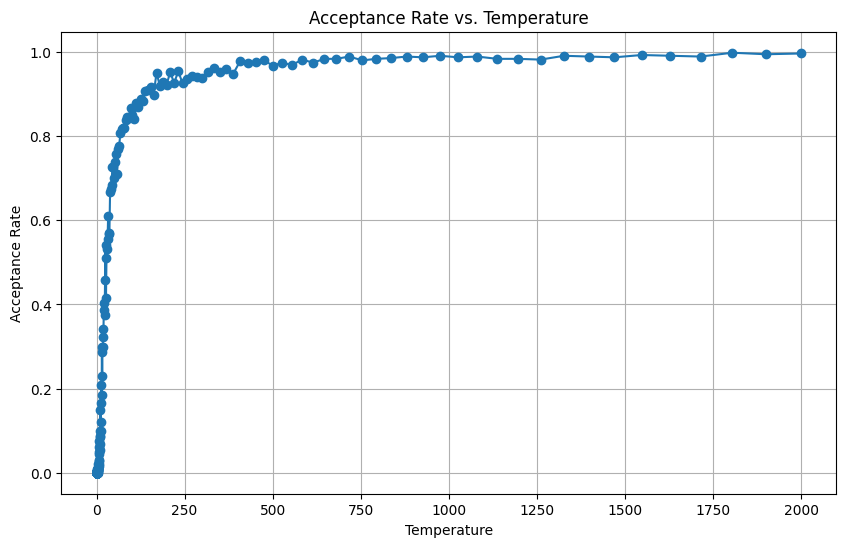

In [27]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Arrays for storing temperatures, function values, iterations, states, and acceptance rates
temperatures = []
function_values = []
iterations = []
states = []
acceptance_rates = []

# Initial parameters
L_0 = 550 # Fixed Markov chain length

# Define the Ackley 2 function
def ackley2(x, y):
    return -200 * math.exp(-0.02 * math.sqrt(x**2 + y**2))

def simulate(temp, func, bounds):
    current_x = random.uniform(bounds[0], bounds[1])
    current_y = random.uniform(bounds[0], bounds[1])
    best_solution = (current_x, current_y)
    best_value = func(current_x, current_y)
    L_i = L_0

    data_dimensions = 3
    simulation_data = np.empty((3000, L_0, data_dimensions))

    for i in range(3000):
        accepted_moves = 0  # To count the number of accepted moves

        for j in range(L_i):
            new_x = random.uniform(bounds[0], bounds[1])
            new_y = random.uniform(bounds[0], bounds[1])
            delta_E = func(new_x, new_y) - func(current_x, current_y)

            if delta_E <= 0 or random.uniform(0, 1) < math.exp(-delta_E / temp):
                current_x = new_x
                current_y = new_y
                accepted_moves += 1  # Increment the accepted moves counter

            current_value = func(current_x, current_y)

            simulation_data[i, j, 0] = temp
            simulation_data[i, j, 1] = j
            simulation_data[i, j, 2] = func(current_x, current_y)

        acceptance_rate = accepted_moves / L_i
        acceptance_rates.append(acceptance_rate)

        best_solution = (current_x, current_y)
        best_value = func(current_x, current_y)

        states.append(best_solution)
        function_values.append(best_value)
        temperatures.append(temp)
        iterations.append(i)

        # Decrease the temperature
        temp *= 0.95

    return best_solution, best_value, states, function_values, temperatures, iterations, simulation_data, acceptance_rates

# Initial temperature and function bounds
initial_temperature = 2000
bounds = (-32, 32)

# Run the simulation
best_solution, best_value, states, function_values, temperatures, iterations, simulation_data, acceptance_rates = simulate(initial_temperature, ackley2, bounds)

# Plot acceptance rate vs. temperature
plt.figure(figsize=(10, 6))
plt.plot(temperatures, acceptance_rates, marker='o')
plt.xlabel('Temperature')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate vs. Temperature')
plt.grid(True)
plt.show()


## From these illustration we select 200K temperature for inital temperature